# Tarefa Numérica 1 - Gráfico e Retrato de Fase
**Alexsander Benatti da Silva (14555221)**

**Ana Paula Tavares da Fonseca (8557207)**

## Equação de Lotka-Volterra

Considere o sistema em que $x$ denota presa e $y$ o predador, em que $a$ e $b$ são as taxas de nascimento e de mortalidade referente às presas, e $c$ e $d$ as taxas referentes ao predador.
$$
\begin{cases}
\frac{dx}{dt} = x(a - by) \\
\frac{dy}{dt} = y(cx-d)
\end{cases}
$$

Vamos considerar um caso em que $a = b = c = d = 1$

In [24]:
# bibliotecas
import numpy as np
import matplotlib.pyplot as plt

# parâmetros do modelo
a,b,c,d = 1.0, 1.0, 1.0, 1.0

# parâmetros da simulação
n = 1000 
t_final = 20
t_inicial = 0
t = np.linspace(t_inicial, t_final, n)
h = (t_final - t_inicial) / n  # passo

# condição inicial
x0 = 2
y0 = 1

# inicializa os vetores e os valores iniciais
x = np.zeros(n)
y = np.zeros(n)

x[0] = x0
y[0] = y0

def f(x,y):
    dxdt = x*(a - b*y) # tx de variação da pop. de presas
    dydt = y*(c*x - d) # tx de variação da pop de predadores
    return dxdt, dydt

# método de euler
for i in range (n-1):
    dx, dy = f(x[i], y[i]) # calcula as derivadas
    x[i+1] = x[i] + h * dx # atualiza a pop. de presas
    y[i+1] = y[i] + h * dy # atualiza a pop. de predadores

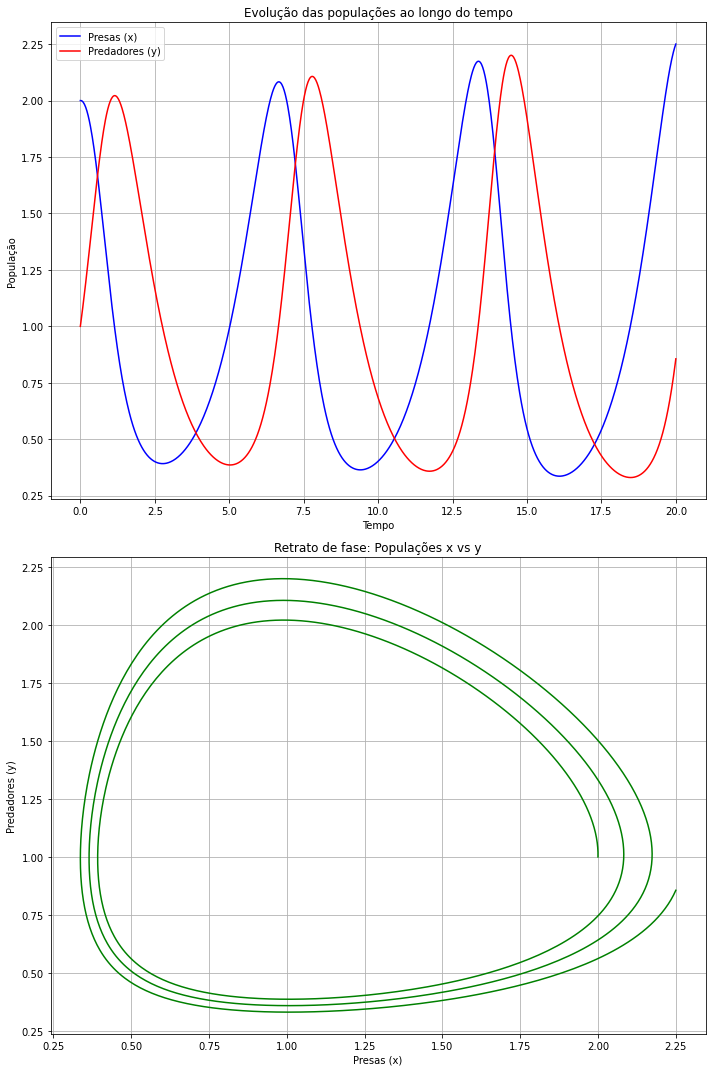

In [25]:
# Populações ao longo do tempo
plt.figure(figsize=(10, 15))

plt.subplot(2, 1, 1)
plt.plot(t, x, label='Presas (x)', color='blue')
plt.plot(t, y, label='Predadores (y)', color='red')
plt.xlabel('Tempo')
plt.ylabel('População')
plt.title('Evolução das populações ao longo do tempo')
plt.legend()
plt.tight_layout()
plt.grid(True)

# 2. Retrato de fase
plt.subplot(2, 1, 2)
plt.plot(x, y, color='green')
plt.xlabel('Presas (x)')
plt.ylabel('Predadores (y)')
plt.title('Retrato de fase: Populações x vs y')
plt.grid(True)
plt.tight_layout()
plt.show()

## Sistema Massa-Mola com Atrito (Sistema Homogêneo)

O sistema massa-mola com atrito representa um dos modelos fundamentais em dinâmica e teoria de oscilações. Este sistema físico consiste em uma massa $m$ conectada a uma mola de constante elástica $k$, sujeita a uma força de atrito proporcional à velocidade com coeficiente $c$.

### Modelagem Matemática

O comportamento dinâmico do sistema pode ser descrito pela equação diferencial de segunda ordem:

$$m\frac{d^2x}{dt^2} + c\frac{dx}{dt} + kx = 0$$

onde:
- $x(t)$ é a posição da massa em função do tempo
- $m$ é a massa do objeto
- $k$ é a constante elástica da mola
- $c$ é o coeficiente de atrito viscoso

### Sistema de Equações de Primeira Ordem

Para resolver numericamente, convertemos a EDO de segunda ordem em um sistema de equações diferenciais de primeira ordem:

$$\begin{cases}
\frac{dx}{dt} = v \\
\frac{dv}{dt} = -\frac{1}{m}(kx + cv)
\end{cases}$$

Onde precisamos então definir as condições iniciais para $x_0$ e $v_0$.

### Características do Sistema

Este é um **sistema homogêneo** (sem forçamento externo) que apresenta comportamento oscilatório amortecido. Dependendo dos valores dos parâmetros $m$, $k$ e $c$, o sistema pode exibir:

1. **Subamortecimento** ($c < 2\sqrt{km}$): Oscilações com amplitude decrescente
2. **Amortecimento crítico** ($c = 2\sqrt{km}$): Retorno ao equilíbrio sem oscilação
3. **Superamortecimento** ($c > 2\sqrt{km}$): Aproximação lenta ao equilíbrio sem oscilação

A energia do sistema é dissipada pelo atrito, fazendo com que as oscilações diminuam progressivamente até que o sistema atinja o equilíbrio estável em $x = 0$.

### Código

Durante as iterações, para aproximarmos a solução pelo Método de Euler, usaremos o seguinte processo:

$$\begin{cases}
x(t_{k+1}) = x(t_k) + h\frac{dx}{dt} \\
v(t_{k+1}) = v(t_k) + h\frac{dv}{dt}
\end{cases}$$

onde $h$ será definido como, tendo $n$ iterações:

$$h = \frac{t_{n} - t_0}{n}$$

In [26]:
def massa_mola(m, k, c, x0, v0, t_inicial, t_final):
    # Diferentes valores de n para comparação
    n_values = [100, 500, 1000, 5000]
    colors = ['red', 'blue', 'green', 'purple']
    line_styles = [':', '-.', '--', '-']

    # Função para resolver o sistema
    def solve_system(n, m, k, c, x0, v0, t_inicial, t_final):
        h = (t_final - t_inicial) / n
        t = np.linspace(t_inicial, t_final, n)
        
        x = np.zeros(n)
        v = np.zeros(n)
        x[0] = x0
        v[0] = v0
        
        for i in range(n-1):
            x[i+1] = x[i] + h * v[i]
            v[i+1] = v[i] + h * (-(1/m)*(k*x[i] + c*v[i]))
        
        return t, x, v

    # Criar subplots
    fig, axes = plt.subplots(1, 3, figsize=(24, 8))
    fig.suptitle(f'Sistema Massa-Mola com diferentes valores de h\nm = {m}, k = {k}, c = {c}, x₀ = {x0}, v₀ = {v0}', 
                fontsize=14, fontweight='bold')

    # Plot 1: Posição vs Tempo
    ax1 = axes[0]
    ax1.set_title('Posição vs Tempo')
    ax1.set_xlabel('Tempo (s)')
    ax1.set_ylabel('Posição (m)')
    ax1.grid(True, alpha=0.3)

    # Plot 2: Velocidade vs Tempo  
    ax2 = axes[1]
    ax2.set_title('Velocidade vs Tempo')
    ax2.set_xlabel('Tempo (s)')
    ax2.set_ylabel('Velocidade (m/s)')
    ax2.grid(True, alpha=0.3)

    # Plot 3: Retrato de fase
    ax3 = axes[2]
    ax3.set_title('Retrato de Fase (Posição vs Velocidade)')
    ax3.set_xlabel('Posição (m)')
    ax3.set_ylabel('Velocidade (m/s)')
    ax3.grid(True, alpha=0.3)

    # Resolver e plotar para cada valor de n
    for i, n in enumerate(n_values):
        t, x, v = solve_system(n, m, k, c, x0, v0, t_inicial, t_final)
        h = (t_final - t_inicial) / n
        
        # Plot posição vs tempo
        ax1.plot(t, x, color=colors[i], linestyle=line_styles[i], 
                linewidth=2, label=f'n = {n}, h = {h}')
        
        # Plot velocidade vs tempo
        ax2.plot(t, v, color=colors[i], linestyle=line_styles[i], 
                linewidth=2, label=f'n = {n}, h = {h}')
        
        # Plot retrato de fase
        ax3.plot(x, v, color=colors[i], linestyle=line_styles[i], 
                linewidth=2, label=f'n = {n}, h = {h}')

    # Adicionar legendas
    for ax in axes.flat:
        ax.legend()

    plt.tight_layout()
    plt.show()

### Exemplos

#### Subamortecimento ($c < 2\sqrt{km}$): Oscilações com amplitude decrescente

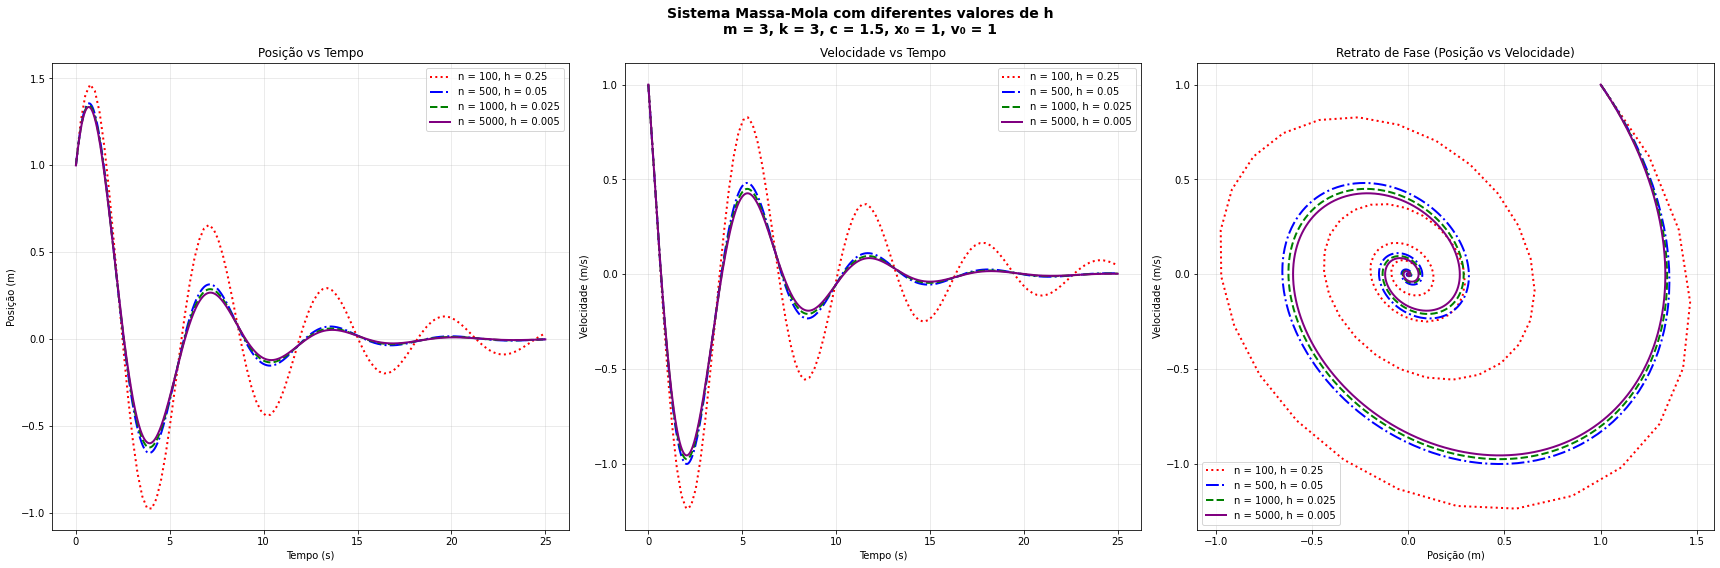

In [27]:
# Parâmetros do sistema
m = 3
k = 3  
c = 1.5
x0 = 1
v0 = 1
t_inicial = 0
t_final = 25

massa_mola(m, k, c, x0, v0, t_inicial, t_final)

#### Amortecimento crítico ($c = 2\sqrt{km}$): Retorno ao equilíbrio sem oscilação

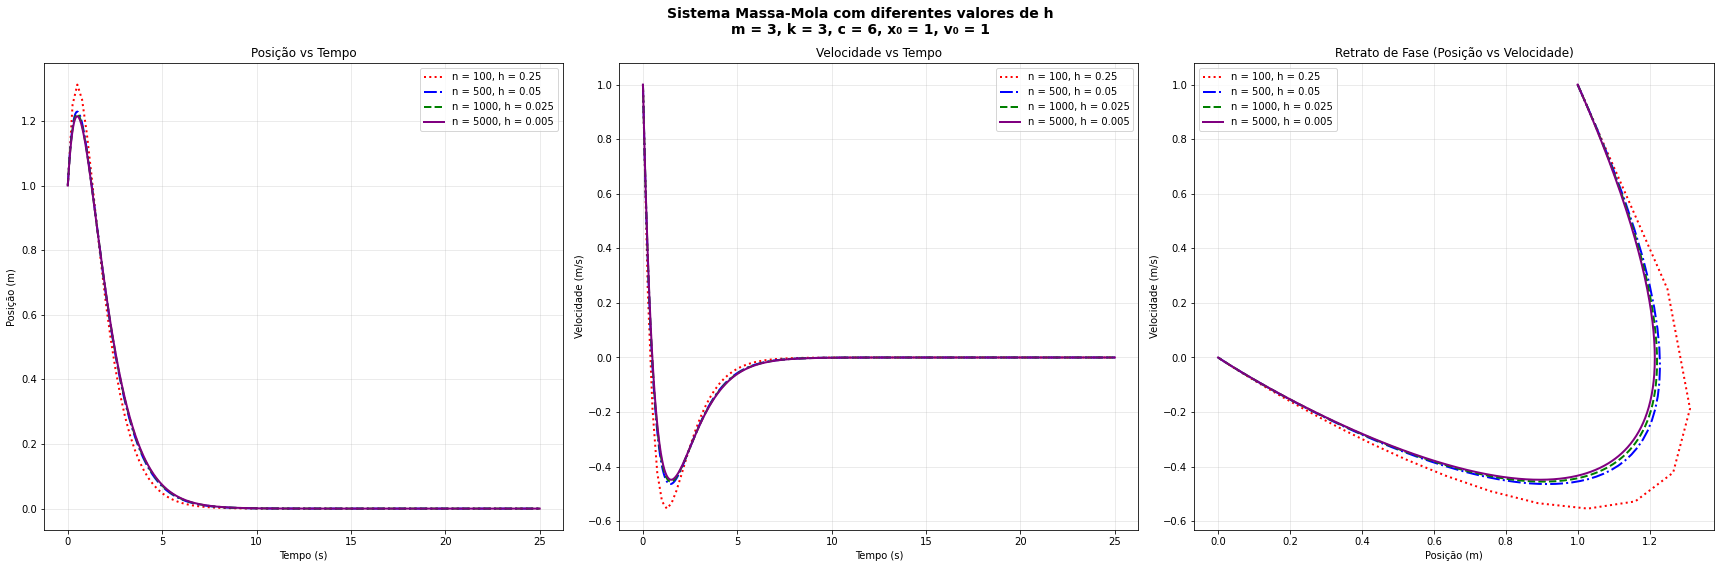

In [28]:
# Parâmetros do sistema
m = 3
k = 3  
c = 6
x0 = 1
v0 = 1
t_inicial = 0
t_final = 25

massa_mola(m, k, c, x0, v0, t_inicial, t_final)

#### Superamortecimento ($c > 2\sqrt{km}$): Aproximação lenta ao equilíbrio sem oscilação

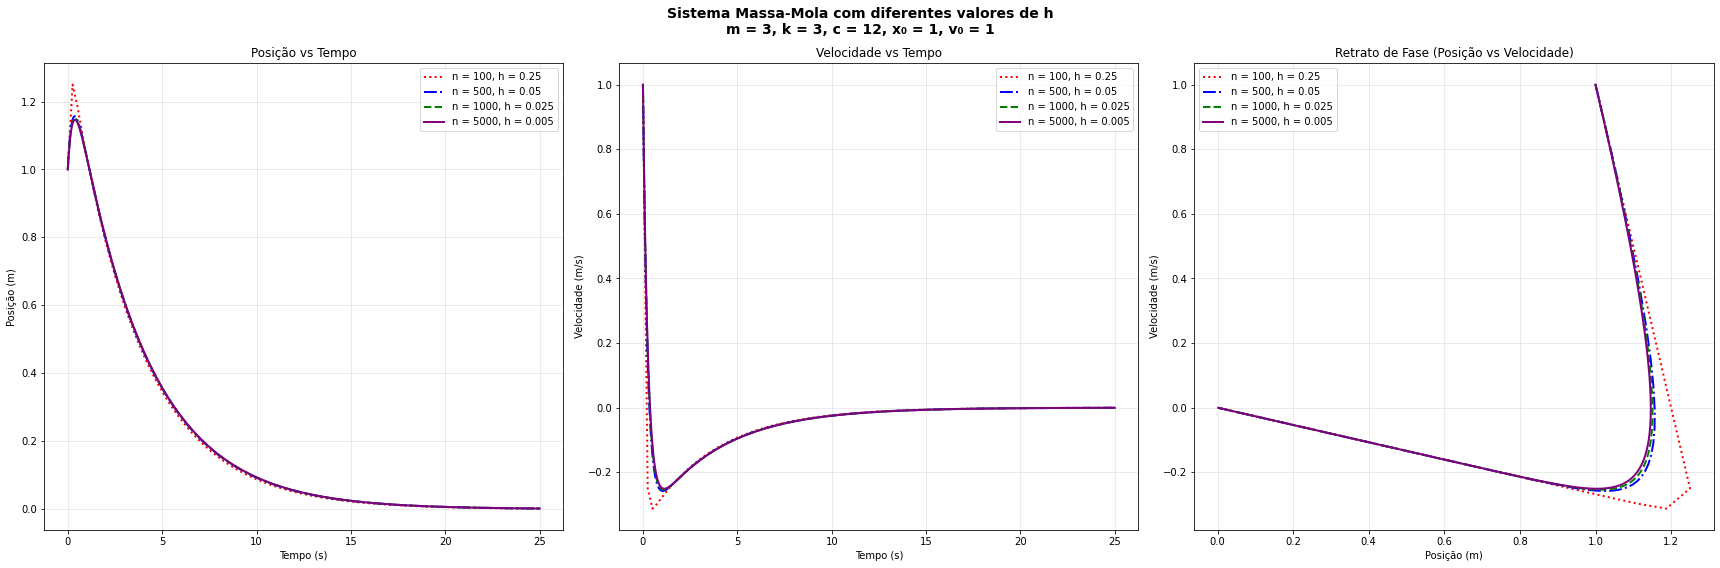

In [29]:
# Parâmetros do sistema
m = 3
k = 3  
c = 12
x0 = 1
v0 = 1
t_inicial = 0
t_final = 25

massa_mola(m, k, c, x0, v0, t_inicial, t_final)